In [7]:

# Importing essential libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Selecting 10 liquid stocks from different sectors (NSE)
tickers = [
    'INFY.NS', 'TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS',
    'ITC.NS', 'LT.NS', 'HINDUNILVR.NS', 'SBIN.NS',
    'BHARTIARTL.NS', 'MARUTI.NS'
]

# Print tickers for confirmation
print("Selected tickers:", tickers)


Selected tickers: ['INFY.NS', 'TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS', 'LT.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'MARUTI.NS']


In [9]:
# Downloading 10 years of historical daily data correctly for adjusted close prices
data = yf.download(tickers, start='2015-01-01', end='2025-01-01', auto_adjust=True)

# 'auto_adjust=True' means downloaded data is already adjusted for splits/dividends, so we can directly use the 'Close' column and the result will already be a DataFrame of Close prices

# Displaying the first few rows
data.head()


[*********************100%***********************]  10 of 10 completed


Price              Close                                                    \
Ticker     BHARTIARTL.NS HDFCBANK.NS HINDUNILVR.NS     INFY.NS      ITC.NS   
Date                                                                         
2015-01-01    308.073486  217.235352    638.149231  367.770813  173.042206   
2015-01-02    309.898743  220.258667    636.045715  374.998047  173.584198   
2015-01-05    303.022461  218.399048    639.705872  371.775635  174.267624   
2015-01-06    300.645447  214.999191    651.821777  364.008118  169.790146   
2015-01-07    301.367035  215.626740    674.707581  365.749786  166.632355   

Price                                                                     ...  \
Ticker           LT.NS    MARUTI.NS RELIANCE.NS     SBIN.NS       TCS.NS  ...   
Date                                                                      ...   
2015-01-01  848.333374  3032.035156  189.999802  279.880554  1006.856750  ...   
2015-01-02  866.226318  3049.143311  189.496933  280.994720  1020.265320  ...   
2015-01-05  878.277222  3129.192627  187.421249  278.766418  1004.759644  ...   
2015-01-06  848.982361  3081.498535  178.915207  267.312683   967.718079  ...   
2015-01-07  846.950500  3120.071289  182.809814  267.535461   956.287170  ...   

Price             Volume                                               \
Ticker     BHARTIARTL.NS HDFCBANK.NS HINDUNILVR.NS  INFY.NS    ITC.NS   
Date                                                                    
2015-01-01       2460188     3544940        372132  2002764   2538978   
2015-01-02       2795887     5900384       1207322  6778320   6599676   
2015-01-05       1605267     4796000        849252  9937024   8238987   
2015-01-06       3916948     8219680       2738679  9667316  13093039   
2015-01-07       4899318     5746112       3744143  7249916  11960580   

Price                                                         
Ticker        LT.NS MARUTI.NS RELIANCE.NS   SBIN.NS   TCS.NS  
Date                                                          
2015-01-01   674298    299232     2963643   6138488   366830  
2015-01-02  1936584    233924     7331366   9935094   925740  
2015-01-05  2176527    536747    10103941   9136716  1754242  
2015-01-06  3048025    422743    18627980  15329257  2423784  
2015-01-07  2063635    369241    20720312  15046745  2636332  

[5 rows x 50 columns]

In [10]:
# Computing returns
avg_returns = ((data["Close"] - data.shift(1)["Close"])/data.shift(1)["Close"]).dropna()

# Displaying first few rows of returns
avg_returns.head()

Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2015-01-02,0.005925,0.013917,-0.003296,0.019651,0.003132,0.021092,0.005642,-0.002647,0.003981,0.013317
2015-01-05,-0.022189,-0.008443,0.005755,-0.008593,0.003937,0.013912,0.026253,-0.010954,-0.007930,-0.015198
2015-01-06,-0.007844,-0.015567,0.018940,-0.020893,-0.025693,-0.033355,-0.015242,-0.045385,-0.041087,-0.036866
2015-01-07,0.002400,0.002919,0.035111,0.004785,-0.018598,-0.002393,0.012518,0.021768,0.000833,-0.011812
2015-01-08,0.017324,0.021005,0.018892,0.005042,0.025032,0.006364,0.010981,-0.014339,0.015659,0.010795


In [11]:
# Defining periods
in_sample = avg_returns.loc['2015-01-01':'2020-12-31']
out_sample = avg_returns.loc['2021-01-01':'2022-12-31']

# Printing shapes to confirm
print("In-sample data shape:", in_sample.shape)
print("Out-of-sample data shape:", out_sample.shape)

# Checking the time ranges
print("\nIn-sample range:", in_sample.index.min(), "to", in_sample.index.max())
print("Out-of-sample range:", out_sample.index.min(), "to", out_sample.index.max())

In-sample data shape: (1479, 10)
Out-of-sample data shape: (496, 10)

In-sample range: 2015-01-02 00:00:00 to 2020-12-31 00:00:00
Out-of-sample range: 2021-01-01 00:00:00 to 2022-12-30 00:00:00


In [12]:
# Mean vector (daily)
mean_daily = in_sample.mean()

# Covariance matrix (daily)
cov_daily = in_sample.cov()
print("cov_daily", cov_daily.shape)
print(cov_daily)

# Correlation matrix
corr_matrix = in_sample.corr()

#  Annualizing (because these are daily log‑returns)
#  Convention: 252 trading days per year
mean_annual = mean_daily * 252
cov_annual = cov_daily * 252
std_annual = np.sqrt(np.diag(cov_annual))

print(" Mean return vector (annualized):")
display(mean_annual.to_frame("Expected Annual Return"))

print("\n Covariance matrix (annualized):")
display(cov_annual)

print("\n Correlation matrix:")
display(corr_matrix)

cov_daily (10, 10)
Ticker         BHARTIARTL.NS  HDFCBANK.NS  HINDUNILVR.NS   INFY.NS    ITC.NS  \
Ticker                                                                         
BHARTIARTL.NS       0.000454     0.000086       0.000069  0.000066  0.000082   
HDFCBANK.NS         0.000086     0.000208       0.000066  0.000069  0.000079   
HINDUNILVR.NS       0.000069     0.000066       0.000227  0.000061  0.000060   
INFY.NS             0.000066     0.000069       0.000061  0.000315  0.000047   
ITC.NS              0.000082     0.000079       0.000060  0.000047  0.000302   
LT.NS               0.000109     0.000133       0.000080  0.000070  0.000099   
MARUTI.NS           0.000107     0.000127       0.000096  0.000074  0.000082   
RELIANCE.NS         0.000108     0.000114       0.000085  0.000083  0.000075   
SBIN.NS             0.000138     0.000143       0.000078  0.000082  0.000126   
TCS.NS              0.000050     0.000057       0.000054  0.000145  0.000051   

Ticker            LT

,Expected Annual Return
Ticker,
BHARTIARTL.NS,0.135470
HDFCBANK.NS,0.220776
HINDUNILVR.NS,0.240785
INFY.NS,0.227460
ITC.NS,0.036437
LT.NS,0.102748
MARUTI.NS,0.195913
RELIANCE.NS,0.310986
SBIN.NS,0.051838



 Covariance matrix (annualized):


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Ticker,,,,,,,,,,
BHARTIARTL.NS,0.114355,0.021743,0.017328,0.016730,0.020596,0.027496,0.026883,0.027311,0.034705,0.012702
HDFCBANK.NS,0.021743,0.052350,0.016517,0.017380,0.019843,0.033562,0.031994,0.028749,0.036121,0.014320
HINDUNILVR.NS,0.017328,0.016517,0.057186,0.015332,0.015036,0.020135,0.024264,0.021488,0.019781,0.013549
INFY.NS,0.016730,0.017380,0.015332,0.079378,0.011935,0.017738,0.018543,0.020882,0.020755,0.036505
ITC.NS,0.020596,0.019843,0.015036,0.011935,0.076028,0.024904,0.020609,0.018850,0.031812,0.012958
LT.NS,0.027496,0.033562,0.020135,0.017738,0.024904,0.081296,0.040220,0.029974,0.055832,0.014393
MARUTI.NS,0.026883,0.031994,0.024264,0.018543,0.020609,0.040220,0.090812,0.037258,0.045512,0.018272
RELIANCE.NS,0.027311,0.028749,0.021488,0.020882,0.018850,0.029974,0.037258,0.092024,0.038455,0.019853
SBIN.NS,0.034705,0.036121,0.019781,0.020755,0.031812,0.055832,0.045512,0.038455,0.139171,0.015847



 Correlation matrix:


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Ticker,,,,,,,,,,
BHARTIARTL.NS,1.000000,0.281015,0.214281,0.175601,0.220881,0.285173,0.263806,0.266233,0.275096,0.149764
HDFCBANK.NS,0.281015,1.000000,0.301876,0.269619,0.314537,0.514464,0.464022,0.414203,0.423178,0.249546
HINDUNILVR.NS,0.214281,0.301876,1.000000,0.227568,0.228040,0.295313,0.336699,0.296216,0.221732,0.225913
INFY.NS,0.175601,0.269619,0.227568,1.000000,0.153634,0.220807,0.218401,0.244327,0.197464,0.516621
ITC.NS,0.220881,0.314537,0.228040,0.153634,1.000000,0.316766,0.248022,0.225364,0.309264,0.187381
LT.NS,0.285173,0.514464,0.295313,0.220807,0.316766,1.000000,0.468096,0.346543,0.524898,0.201280
MARUTI.NS,0.263806,0.464022,0.336699,0.218401,0.248022,0.468096,1.000000,0.407566,0.404841,0.241769
RELIANCE.NS,0.266233,0.414203,0.296216,0.244327,0.225364,0.346543,0.407566,1.000000,0.339802,0.260941
SBIN.NS,0.275096,0.423178,0.221732,0.197464,0.309264,0.524898,0.404841,0.339802,1.000000,0.169374


In [13]:

import cvxpy as cp
import itertools

tickers_list = list(cov_annual.columns)
results = []

ind = {}
for i in range(10):
    ind[tickers[i]] = i


def optimise(cov_annual, subset):
    w = cp.Variable(len(subset))
    subset = list(subset)
    sub_cov = cov_annual.loc[subset, subset].to_numpy()
    one = np.ones(len(subset))

    objective = cp.Minimize(w.T@sub_cov@w)
    constraints = [w[i] >= 0 for i in range(len(subset))]
    constraints.append(w.T@one == 1)

    prob = cp.Problem(objective, constraints)

    return prob.solve(), w.value

def subset_opt(cov_annual,optimise):
    subset_vars = []
    opt_wts = []
    for k in range(1, 11):
        combs = list(itertools.combinations(tickers_list, k))
        print(f"Computing {len(combs)} combinations for k = {k} ...")
        
        min_var = np.inf
        weights = np.zeros(k)
        opt_comb = combs[0]
        for comb in combs:
            var, w = optimise(cov_annual, comb)
            if min_var > var:
                min_var = var
                weights = w
                opt_comb = comb
                
        print(min_var, k, opt_comb)
        w_extd = np.zeros(10)
        for j in range(k):
            w_extd[ind[opt_comb[j]]] = weights[j]
        
        subset_vars.append(min_var)
        opt_wts.append(w_extd)

    return subset_vars, opt_wts

subset_vars, opt_wts = subset_opt(cov_annual, optimise)

print(subset_vars)
print(opt_wts[-1])
print(opt_wts)

    

Computing 10 combinations for k = 1 ...
0.052350045628211876 1 ('HDFCBANK.NS',)
Computing 45 combinations for k = 2 ...
0.035565980110224965 2 ('HDFCBANK.NS', 'HINDUNILVR.NS')
Computing 120 combinations for k = 3 ...
0.028947409759625467 3 ('HDFCBANK.NS', 'HINDUNILVR.NS', 'TCS.NS')
Computing 210 combinations for k = 4 ...
0.02667695346075972 4 ('HDFCBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'TCS.NS')
Computing 252 combinations for k = 5 ...
0.02594360772907186 5 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'TCS.NS')
Computing 210 combinations for k = 6 ...
0.025464746385441186 6 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'TCS.NS')
Computing 120 combinations for k = 7 ...
0.025366809361577276 7 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'RELIANCE.NS', 'TCS.NS')
Computing 45 combinations for k = 8 ...
0.025295883765660294 8 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'LT.NS', 'RELIANCE.NS', 'TCS.

In [14]:
#out-sample analysis

In [15]:
mean_daily_out = out_sample.mean()

# Covariance matrix (daily)
cov_daily_out = out_sample.cov()
print("cov_daily_out", cov_daily_out.shape)
print(cov_daily_out)

# Correlation matrix
corr_matrix_out = out_sample.corr()

#  Annualizing (because these are daily log‑returns)
#  Convention: 252 trading days per year
mean_annual_out = mean_daily_out * 252
cov_annual_out = cov_daily_out * 252
std_annual_out = np.sqrt(np.diag(cov_annual_out))

print(" Mean return vector (annualized):")
display(mean_annual_out.to_frame("Expected Annual Return"))

print("\n Covariance matrix (annualized):")
display(cov_annual_out)

print("\n Correlation matrix:")
display(corr_matrix_out)

cov_daily_out (10, 10)
Ticker         BHARTIARTL.NS  HDFCBANK.NS  HINDUNILVR.NS   INFY.NS    ITC.NS  \
Ticker                                                                         
BHARTIARTL.NS       0.000265     0.000084       0.000035  0.000066  0.000062   
HDFCBANK.NS         0.000084     0.000244       0.000056  0.000081  0.000065   
HINDUNILVR.NS       0.000035     0.000056       0.000200  0.000056  0.000053   
INFY.NS             0.000066     0.000081       0.000056  0.000239  0.000050   
ITC.NS              0.000062     0.000065       0.000053  0.000050  0.000217   
LT.NS               0.000093     0.000112       0.000050  0.000111  0.000081   
MARUTI.NS           0.000087     0.000096       0.000076  0.000059  0.000061   
RELIANCE.NS         0.000077     0.000094       0.000048  0.000079  0.000077   
SBIN.NS             0.000102     0.000143       0.000040  0.000073  0.000121   
TCS.NS              0.000062     0.000068       0.000063  0.000151  0.000039   

Ticker          

,Expected Annual Return
Ticker,
BHARTIARTL.NS,0.277867
HDFCBANK.NS,0.102317
HINDUNILVR.NS,0.073702
INFY.NS,0.144007
ITC.NS,0.311059
LT.NS,0.288993
MARUTI.NS,0.091448
RELIANCE.NS,0.164353
SBIN.NS,0.465906



 Covariance matrix (annualized):


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Ticker,,,,,,,,,,
BHARTIARTL.NS,0.066683,0.021117,0.008753,0.016730,0.015578,0.023429,0.021918,0.019512,0.025652,0.015635
HDFCBANK.NS,0.021117,0.061582,0.014002,0.020521,0.016376,0.028323,0.024216,0.023723,0.036151,0.017124
HINDUNILVR.NS,0.008753,0.014002,0.050395,0.013999,0.013281,0.012614,0.019071,0.012180,0.010072,0.015815
INFY.NS,0.016730,0.020521,0.013999,0.060238,0.012542,0.028062,0.014925,0.019915,0.018314,0.037968
ITC.NS,0.015578,0.016376,0.013281,0.012542,0.054712,0.020393,0.015453,0.019304,0.030425,0.009725
LT.NS,0.023429,0.028323,0.012614,0.028062,0.020393,0.063635,0.027393,0.026475,0.037713,0.022778
MARUTI.NS,0.021918,0.024216,0.019071,0.014925,0.015453,0.027393,0.075652,0.020183,0.032170,0.014367
RELIANCE.NS,0.019512,0.023723,0.012180,0.019915,0.019304,0.026475,0.020183,0.068741,0.030173,0.018298
SBIN.NS,0.025652,0.036151,0.010072,0.018314,0.030425,0.037713,0.032170,0.030173,0.091105,0.015353



 Correlation matrix:


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Ticker,,,,,,,,,,
BHARTIARTL.NS,1.000000,0.329536,0.150992,0.263964,0.257909,0.359672,0.308587,0.288192,0.329106,0.272368
HDFCBANK.NS,0.329536,1.000000,0.251353,0.336924,0.282130,0.452447,0.354786,0.364620,0.482634,0.310404
HINDUNILVR.NS,0.150992,0.251353,1.000000,0.254087,0.252926,0.222740,0.308865,0.206943,0.148638,0.316918
INFY.NS,0.263964,0.336924,0.254087,1.000000,0.218471,0.453251,0.221086,0.309481,0.247213,0.695887
ITC.NS,0.257909,0.282130,0.252926,0.218471,1.000000,0.345612,0.240191,0.314769,0.430949,0.187021
LT.NS,0.359672,0.452447,0.222740,0.453251,0.345612,1.000000,0.394810,0.400288,0.495298,0.406185
MARUTI.NS,0.308587,0.354786,0.308865,0.221086,0.240191,0.394810,1.000000,0.279875,0.387495,0.234978
RELIANCE.NS,0.288192,0.364620,0.206943,0.309481,0.314769,0.400288,0.279875,1.000000,0.381275,0.313952
SBIN.NS,0.329106,0.482634,0.148638,0.247213,0.430949,0.495298,0.387495,0.381275,1.000000,0.228815


In [16]:
#Optimal returns for stocks
optimal_returns = []
for k in range(1,11):
    optimal_returns.append((k, mean_annual_out@opt_wts[k-1]))

print(optimal_returns)

[(1, 0.14400737882388), (2, 0.11938876256361812), (3, 0.11399724513960921), (4, 0.1481859011465678), (5, 0.1739259001443232), (6, 0.18664568698517692), (7, 0.18244301010657657), (8, 0.18606374458558383), (9, 0.18547583637742043), (10, 0.18547583637742046)]


In [17]:
import math
# Sharpe Ratios
# For in-sample period, average risk free rate (India) was approximately 7.2%
# For out-sample period, average risk free rate (India) was approximately 6.7%

for k in range(1,11):
    print("In-sample) Sharpe ratio for", k, "stocks (at optimality) is", (optimal_returns[k-1][1] - 0.072)/math.sqrt(subset_vars[k-1])) 

In-sample) Sharpe ratio for 1 stocks (at optimality) is 0.3147157443291205
In-sample) Sharpe ratio for 2 stocks (at optimality) is 0.25128003143383115
In-sample) Sharpe ratio for 3 stocks (at optimality) is 0.24684023368275815
In-sample) Sharpe ratio for 4 stocks (at optimality) is 0.46645149923536405
In-sample) Sharpe ratio for 5 stocks (at optimality) is 0.632804226264664
In-sample) Sharpe ratio for 6 stocks (at optimality) is 0.7184359292720923
In-sample) Sharpe ratio for 7 stocks (at optimality) is 0.6934342879353655
In-sample) Sharpe ratio for 8 stocks (at optimality) is 0.7171709612810432
In-sample) Sharpe ratio for 9 stocks (at optimality) is 0.7135271966928585
In-sample) Sharpe ratio for 10 stocks (at optimality) is 0.7135271966928587


In [32]:
vals = []
for k in range(1,11):
    vals.append(opt_wts[k-1].T @ cov_annual_out @ opt_wts[k-1])
print(vals)
for j in range(1,11):
    print("Out-sample) Sharpe ratio for", j, "stocks (at optimality) is", (optimal_returns[j-1][1] - 0.067)/math.sqrt(vals[j-1])) 

[0.06158218484036251, 0.03755798114989023, 0.03365325476097694, 0.035774092346381584, 0.03169625723728521, 0.02943031452955449, 0.028049918332331142, 0.02719215116707048, 0.02725628392508261, 0.027256283925082617]
Out-sample) Sharpe ratio for 1 stocks (at optimality) is 0.3103164473889313
Out-sample) Sharpe ratio for 2 stocks (at optimality) is 0.27032550352096885
Out-sample) Sharpe ratio for 3 stocks (at optimality) is 0.2561880481099793
Out-sample) Sharpe ratio for 4 stocks (at optimality) is 0.42923616276138266
Out-sample) Sharpe ratio for 5 stocks (at optimality) is 0.6005911434013899
Out-sample) Sharpe ratio for 6 stocks (at optimality) is 0.6974283479638552
Out-sample) Sharpe ratio for 7 stocks (at optimality) is 0.6892897836632279
Out-sample) Sharpe ratio for 8 stocks (at optimality) is 0.7220341754252169
Out-sample) Sharpe ratio for 9 stocks (at optimality) is 0.7176231842092018
Out-sample) Sharpe ratio for 10 stocks (at optimality) is 0.7176231842092018


In [ ]:
# Max Drawdown for out-sample period
out_sample_returns = []

for w in opt_wts:
    port_ret = (out_sample @ w).dropna()  
    out_sample_returns.append(port_ret)


def max_drawdown(returns):
    cum_ret = (1 + returns).cumprod()
    peak = cum_ret.cummax()
    drawdown = (cum_ret - peak) / peak
    return drawdown.min() 


drawdowns = [max_drawdown(r) for r in out_sample_returns]


summary = pd.DataFrame({
    "Num_Assets": np.arange(1, 11),
    "In-Sample_Min_Var": subset_vars,
    "Out-Sample_Max_Drawdown": drawdowns
})

display(summary)

,Num_Assets,In-Sample_Min_Var,Out-Sample_Max_Drawdown
0,1,0.052350,-0.288523
1,2,0.035566,-0.187145
2,3,0.028947,-0.172126
3,4,0.026677,-0.136294
4,5,0.025944,-0.136174
5,6,0.025465,-0.128813
6,7,0.025367,-0.122395
7,8,0.025296,-0.123670
8,9,0.025292,-0.123415
9,10,0.025292,-0.123415


In [20]:
#PART B

P1 = avg_returns.loc['2015-01-01':'2019-12-31'].dropna()
P2 = avg_returns.loc['2020-01-01':'2021-12-31'].dropna()
out_sample_B = avg_returns.loc['2022-01-01':'2023-12-31'].dropna()

mean_P1 = P1.mean()
mean_P2 = P2.mean()
mean_out_B = out_sample_B.mean()

# Covariance matrix (daily)
cov_P1 = P1.cov()
print("cov_P1", cov_P1.shape)
print(cov_P1)

cov_P2 = P2.cov()
print("cov_P2", cov_P2.shape)
print(cov_P2)

cov_out_B = out_sample_B.cov()

# Correlation matrix
corr_matrix = in_sample.corr()

#  Annualizing (because these are daily log‑returns)
#  Convention: 252 trading days per year
mean_P1_annual = mean_P1 * 252
cov_P1_annual = cov_P1 * 252

mean_P2_annual = mean_P2 * 252
cov_P2_annual = cov_P2 * 252

mean_out_B_annual = mean_out_B * 252
cov_out_B_annual = cov_out_B * 252


cov_P1 (10, 10)
Ticker         BHARTIARTL.NS  HDFCBANK.NS  HINDUNILVR.NS   INFY.NS    ITC.NS  \
Ticker                                                                         
BHARTIARTL.NS       0.000396     0.000043       0.000040  0.000032  0.000050   
HDFCBANK.NS         0.000043     0.000114       0.000043  0.000020  0.000045   
HINDUNILVR.NS       0.000040     0.000043       0.000177  0.000021  0.000041   
INFY.NS             0.000032     0.000020       0.000021  0.000250  0.000017   
ITC.NS              0.000050     0.000045       0.000041  0.000017  0.000236   
LT.NS               0.000076     0.000075       0.000053  0.000032  0.000063   
MARUTI.NS           0.000064     0.000066       0.000062  0.000023  0.000056   
RELIANCE.NS         0.000077     0.000054       0.000040  0.000031  0.000044   
SBIN.NS             0.000098     0.000070       0.000053  0.000036  0.000076   
TCS.NS              0.000019     0.000020       0.000026  0.000092  0.000024   

Ticker            LT.NS

In [21]:

var1, w1 = optimise(cov_P1_annual, tickers)
print(w1)

print("a", var1, w1)

def regularised_optimise(cov_annual, lambd):
    subset = tickers
    w = cp.Variable(len(subset))
    subset = list(subset)
    sub_cov = cov_annual.loc[subset, subset].to_numpy()
    one = np.ones(len(subset))

    objective = cp.Minimize(w.T@cov_annual@w + lambd * cp.norm(w - w1, 1))
    constraints = [w[i] >= 0 for i in range(len(subset))]
    constraints.append(w.T@one == 1)

    prob = cp.Problem(objective, constraints)

    return prob.solve(), w.value
    
#0.1, 1
lambdas = [0, 0.01, 0.1, 1]

new_weights = []
turnover = []
out_sample_mean = []
out_sample_var = []
for lambd in lambdas:
    var, w = regularised_optimise(cov_P2_annual, lambd)
    new_weights.append(w)
    turnover.append(np.linalg.norm(w - w1, ord = 1))

    out_sample_mean.append(w.T @ mean_out_B_annual)
    out_sample_var.append(w.T @ cov_out_B_annual @ w)

print("out_sample_mean",out_sample_mean)
print("out_sample_var", out_sample_var)
print("turnover", turnover)
print("new_weights", new_weights)

[1.16830337e-01 1.59511208e-01 6.65695748e-02 2.98295098e-01
 1.10969091e-01 4.14232085e-04 1.61585071e-01 1.27303102e-23
 5.20843669e-02 3.37410208e-02]
a 0.015000600789555979 [1.16830337e-01 1.59511208e-01 6.65695748e-02 2.98295098e-01
 1.10969091e-01 4.14232085e-04 1.61585071e-01 1.27303102e-23
 5.20843669e-02 3.37410208e-02]
out_sample_mean [0.17724653823534825, 0.13745292512077661, 0.1331101117907727, 0.13311011179077262]
out_sample_var [0.018546373249809997, 0.019547930847501588, 0.02162098934428784, 0.021620989344287828]
turnover [1.1788050171130133, 0.48076740639019316, 2.2201395388234232e-16, 9.241408438998381e-17]
new_weights [array([ 8.65816642e-02,  9.91674182e-02,  3.10217090e-01,  1.31545479e-02,
        1.61857253e-01,  8.67178931e-02, -2.07640944e-08, -2.78130841e-08,
       -8.70634590e-09,  2.42304192e-01]), array([ 1.16830337e-01,  1.59511208e-01,  2.50107091e-01,  2.00771512e-01,
        1.31713546e-01,  4.14232085e-04,  6.26172587e-02, -3.14899664e-23,
        8.19

In [22]:
# Part C

In [23]:
# Mean Sensitivity
def perturb(vec, delta):
    eps = np.random.uniform(-delta, delta, size = vec.shape)
    return vec * (1 + eps)

perturbed_mean = perturb(mean_annual_out, 0.075)



In [25]:
subset_vars, opt_wts = subset_opt(cov_annual_out , optimise)

print(subset_vars)
print(opt_wts[-1])
print(opt_wts)

Computing 10 combinations for k = 1 ...
0.049417496846143716 1 ('TCS.NS',)
Computing 45 combinations for k = 2 ...
0.030811801354830984 2 ('ITC.NS', 'TCS.NS')
Computing 120 combinations for k = 3 ...
0.025762517153580442 3 ('HINDUNILVR.NS', 'ITC.NS', 'TCS.NS')
Computing 210 combinations for k = 4 ...
0.023423096996662306 4 ('BHARTIARTL.NS', 'HINDUNILVR.NS', 'ITC.NS', 'TCS.NS')
Computing 252 combinations for k = 5 ...
0.022566473395349975 5 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'TCS.NS')
Computing 210 combinations for k = 6 ...
0.02216010235106635 6 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'RELIANCE.NS', 'TCS.NS')
Computing 120 combinations for k = 7 ...
0.021917985017416375 7 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'MARUTI.NS', 'RELIANCE.NS', 'TCS.NS')
Computing 45 combinations for k = 8 ...
0.02182677671219919 8 ('BHARTIARTL.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'MARUTI.NS', 'RELIANCE.NS', 'TCS.NS')
Compu

In [27]:
#Same weights

Ticker         BHARTIARTL.NS  HDFCBANK.NS  HINDUNILVR.NS   INFY.NS    ITC.NS  \
Ticker                                                                         
BHARTIARTL.NS       0.066683     0.020690       0.009295  0.016981  0.015518   
HDFCBANK.NS         0.020690     0.061582       0.014449  0.020812  0.015133   
HINDUNILVR.NS       0.009295     0.014449       0.050395  0.012976  0.013092   
INFY.NS             0.016981     0.020812       0.012976  0.060238  0.013662   
ITC.NS              0.015518     0.015133       0.013092  0.013662  0.054712   
LT.NS               0.021644     0.030579       0.011540  0.029183  0.020203   
MARUTI.NS           0.021005     0.025933       0.018782  0.016281  0.014794   
RELIANCE.NS         0.017694     0.024016       0.013112  0.020627  0.020096   
SBIN.NS             0.024586     0.033246       0.011037  0.019758  0.030360   
TCS.NS              0.014980     0.017895       0.014788  0.036012  0.010393   

Ticker            LT.NS  MARUTI.NS  REL

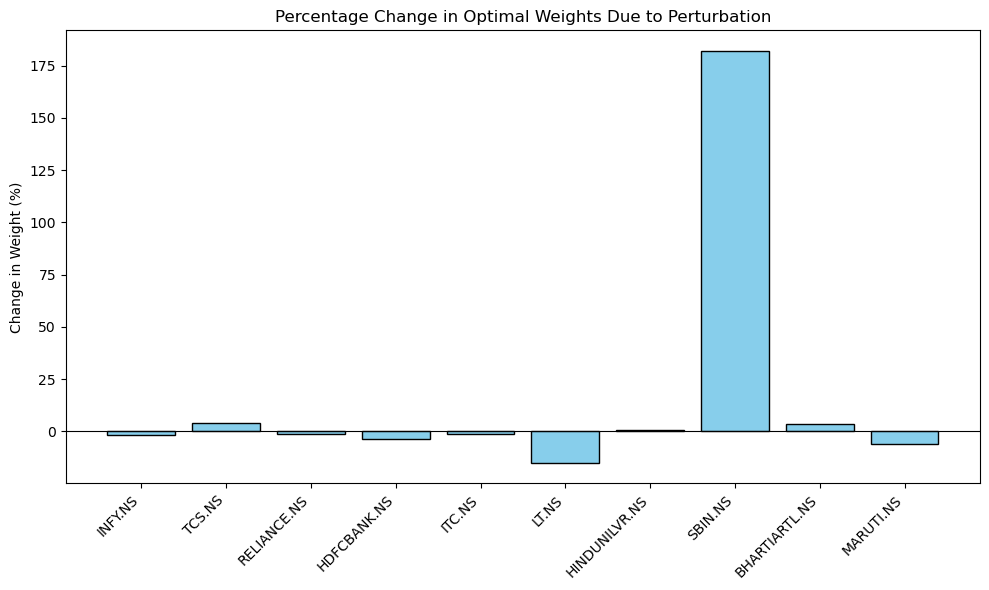

In [28]:

def perturb_offdiag(cov, delta):
    cov = np.array(cov, dtype = float)
    perturbed_cov = cov.copy()
    n = cov.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            factor = 1 + np.random.uniform(-delta, delta)
            perturbed_cov[i, j] *= factor
            perturbed_cov[j, i] = perturbed_cov[i, j]
    return perturbed_cov

cov_perturbed = pd.DataFrame(perturb_offdiag(cov_annual_out, 0.1), index = cov_annual_out.index, columns = cov_annual_out.columns)
print(cov_perturbed)
subset_vars_pert, opt_wts_pert = optimise(cov_perturbed, tickers)

opt_wts_ = np.array(opt_wts[-1])
opt_wts_pert = np.array(opt_wts_pert).flatten()
print(opt_wts_.shape)
print(opt_wts_pert.shape)
valid = opt_wts_ != 0

avg_change = np.mean((opt_wts_pert[valid] - opt_wts_[valid]) / opt_wts_[valid])

print("Average percentage change in weights:", avg_change)

import matplotlib.pyplot as plt
import numpy as np

# --- Ensure both are numpy arrays ---
opt_wts_ = np.array(opt_wts_).flatten()
opt_wts_pert = np.array(opt_wts_pert).flatten()

# --- Select the corresponding subset of 10 tickers from the full portfolio ---
# Assuming your perturbed optimization used these 10 tickers:
tickers_subset = tickers  # ['INFY.NS', 'TCS.NS', ...] (10 total)
opt_wts_subset = opt_wts_[:10]  # take first 10 weights if they correspond

# --- Compute percentage change ---
pct_change = 100 * (opt_wts_pert - opt_wts_subset) / np.where(opt_wts_subset != 0, opt_wts_subset, np.nan)

# --- Plot the bar chart ---
plt.figure(figsize=(10, 6))
plt.bar(tickers_subset, pct_change, color='skyblue', edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Percentage Change in Optimal Weights Due to Perturbation')
plt.ylabel('Change in Weight (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [29]:
#variance sensitivity

In [30]:
import matplotlib.pyplot as plt

def ensure_array(vec):
    a = np.array(vec).astype(float)
    return a.ravel()

def ensure_cov_matrix(cov):
    # return numpy array and optional index/columns if passed DataFrame
    if isinstance(cov, pd.DataFrame):
        return cov.values, list(cov.index), list(cov.columns)
    else:
        return np.array(cov, dtype=float), None, None

# Inputs you should set:
# cov_input       : covariance matrix (pandas DataFrame or numpy array)
# w               : optimized weights vector (1d numpy array)
# assume_sym_pert : if True, an off-diagonal perturbation affects both (i,j) and (j,i);
#                   if False, derivative per single matrix entry is used.
#
# Example:
# cov_input = cov_annual_out  # or cov_perturbed etc.
# w = opt_wts_subset          # must match cov dimension (len(w) == cov.shape[0])
# assume_sym_pert = True

def variance_sensitivities(cov_input, w, assume_sym_pert=True):
    cov, idx, cols = ensure_cov_matrix(cov_input)
    w = ensure_array(w)
    n = cov.shape[0]
    assert w.size == n, "weights length must match covariance dimension"

    V = float(w.T @ cov @ w)    # scalar variance

    # base per-element sensitivity (∂V/∂Σ_ij = w_i * w_j)
    S = np.outer(w, w)          # shape (n,n)

    if assume_sym_pert:
        # if you perturb off-diagonal symmetrically, effective sensitivity is doubled off-diagonal
        S_sym = S.copy()
        i,j = np.diag_indices(n)
        S_sym[i,j] = np.diag(S)    # diagonal unchanged (w_i^2)
        S_sym = S_sym + S_sym.T - np.diag(np.diag(S_sym))  # ensure symmetric; off-diags currently w_i w_j; want 2 w_i w_j
        # simpler: S_sym = np.where(np.eye(n), np.diag(S), 2*S) but below we'll compute explicitly:
        S_sym = np.where(np.eye(n), np.diag(S), 2*S)
        effective_S = S_sym
    else:
        effective_S = S

    # Elasticities: relative change in V per relative change in Sigma_ij
    # Use elementwise sigma_ij. For zero entries, set elasticity to np.nan to avoid divide-by-zero.
    with np.errstate(divide='ignore', invalid='ignore'):
        elasticity = effective_S * cov / V    # shape (n,n)

    return {
        "variance": V,
        "sensitivity_matrix": effective_S,   # same units as variance per unit change in Sigma (if sym_pert then doubled off-diags)
        "per_entry_sensitivity": S,          # w_i w_j
        "elasticity": elasticity,
        "index": idx if idx is not None else list(range(n))
    }

# Finite difference check for a few elements (sanity)
def finite_diff_check(cov_input, w, eps=1e-6, pairs=None, symmetric=True):
    cov, idx, _ = ensure_cov_matrix(cov_input)
    n = cov.shape[0]
    w = ensure_array(w)
    base_var = float(w.T @ cov @ w)
    if pairs is None:
        # pick top few nonzero covariances or a random sample
        pairs = [(i,j) for i in range(n) for j in range(i, min(i+3, n))][:10]

    results = []
    for (i,j) in pairs:
        cov2 = cov.copy()
        if symmetric and i!=j:
            cov2[i,j] += eps
            cov2[j,i] += eps
        else:
            cov2[i,j] += eps
        var2 = float(w.T @ cov2 @ w)
        approx_deriv = (var2 - base_var) / eps
        # analytic:
        analytic_single = w[i]*w[j]              # ∂V/∂Σ_ij
        analytic_sym = 2*w[i]*w[j] if (i!=j and symmetric) else analytic_single
        results.append({
            "pair": (i,j),
            "approx_deriv": approx_deriv,
            "analytic_single": analytic_single,
            "analytic_sym": analytic_sym
        })
    return results

# helper to show top-k sensitive entries
def top_k_sens(sens_matrix, index=None, k=10):
    n = sens_matrix.shape[0]
    idxs = []
    for i in range(n):
        for j in range(i, n):
            idxs.append((i,j,sens_matrix[i,j]))
    # sort by absolute sensitivity
    idxs_sorted = sorted(idxs, key=lambda x: abs(x[2]), reverse=True)
    topk = idxs_sorted[:k]
    if index is not None:
        pretty = [(index[i], index[j], val) for (i,j,val) in topk]
    else:
        pretty = topk
    return pretty

# plotting heatmap
def plot_heatmap(mat, labels=None, title="Sensitivity matrix"):
    plt.figure(figsize=(7,6))
    im = plt.imshow(mat, aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    if labels is not None:
        plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)
        plt.yticks(range(len(labels)), labels, fontsize=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()


Portfolio variance: 0.02629022076022238
Top sensitivities: [('INFY.NS', 'MARUTI.NS', 0.09640006932092882), ('HDFCBANK.NS', 'INFY.NS', 0.0951628226946752), ('INFY.NS', 'INFY.NS', 0.08897996570100522), ('BHARTIARTL.NS', 'INFY.NS', 0.06969983396566362), ('INFY.NS', 'ITC.NS', 0.0662030718853428), ('HDFCBANK.NS', 'MARUTI.NS', 0.05154925961293279), ('HINDUNILVR.NS', 'INFY.NS', 0.03971475574861155), ('BHARTIARTL.NS', 'MARUTI.NS', 0.03775607673599775), ('BHARTIARTL.NS', 'HDFCBANK.NS', 0.0372714963939788), ('ITC.NS', 'MARUTI.NS', 0.03586189693784845)]


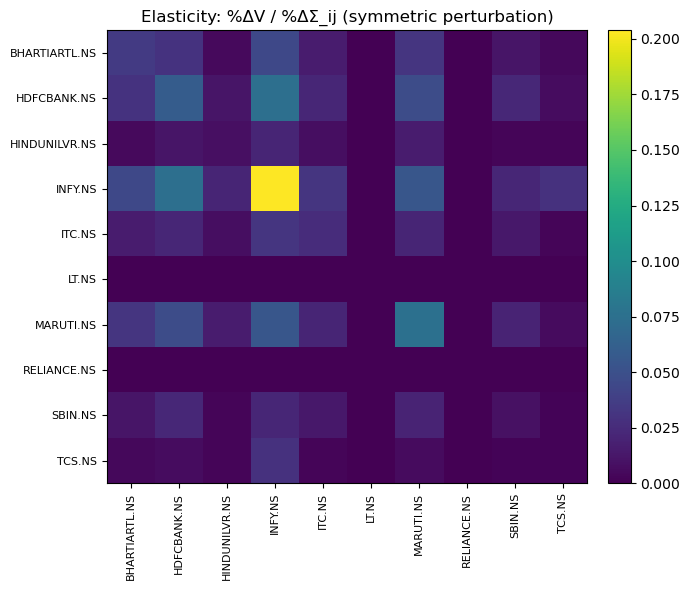

{'pair': (0, 1), 'approx_deriv': 0.03727149639615179, 'analytic_single': 0.0186357481969894, 'analytic_sym': 0.0372714963939788}
{'pair': (0, 2), 'approx_deriv': 0.015554691777663887, 'analytic_single': 0.007777345888642655, 'analytic_sym': 0.01555469177728531}
{'pair': (1, 2), 'approx_deriv': 0.02123718654059581, 'analytic_single': 0.010618593269543026, 'analytic_sym': 0.021237186539086052}
{'pair': (0, 0), 'approx_deriv': 0.013649327737508266, 'analytic_single': 0.013649327735092039, 'analytic_sym': 0.013649327735092039}
{'pair': (1, 1), 'approx_deriv': 0.025443825338311576, 'analytic_single': 0.025443825337178913, 'analytic_sym': 0.025443825337178913}
{'pair': (2, 2), 'approx_deriv': 0.004431508295738018, 'analytic_single': 0.004431508294439743, 'analytic_sym': 0.004431508294439743}


In [31]:
out = variance_sensitivities(cov_annual_out, w, assume_sym_pert=True)

print("Portfolio variance:", out['variance'])
S = out['sensitivity_matrix']     # use this if you perturbed symmetric entries
print("Top sensitivities:", top_k_sens(S, index=out['index'], k=10))

# Elasticities (percent change in V per percent change in Σ_ij)
E = out['elasticity']
plot_heatmap(E, labels=out['index'], title="Elasticity: %ΔV / %ΔΣ_ij (symmetric perturbation)")

# Finite-difference sanity check (first 8 pairs)
fd = finite_diff_check(cov_annual_out, w, eps=1e-6, pairs=[(0,1),(0,2),(1,2),(0,0),(1,1),(2,2)])
for r in fd:
    print(r)
